<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/keras_hyperparameterOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last amended: 11th Jan, 2021<br>
Hyperparameter tuning example of Neural Network using keras-tuner of dense network<br>
Ref:<br>
https://keras-team.github.io/keras-tuner/ <br>
https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html <br>


In [ ]:
# https://keras-team.github.io/keras-tuner/
# https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html


In [1]:
# Install keras-tuner
# It is not a part of tensorflow package
!pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 6.0MB/s 


In [2]:
# Import normal libraries
import tensorflow as tf
from tensorflow import keras
import kerastuner as kt



In [3]:
# Display outputs of multiple commands from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [4]:
# Get data.
# Give a shortname for kears fashion_mnist module
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
# What all attributes/functions this module contains
dir(fashion_mnist)  

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [6]:
# Look at load_data function
help(fashion_mnist.load_data)

Help on function load_data in module tensorflow.python.keras.datasets.fashion_mnist:

load_data()
    Loads the Fashion-MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST. The class labels are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |
    
    Returns:
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    
        **x_train, x_test**: uint8 arrays of grayscale image data with shape
          (num_samples, 28, 28).
    
        **y_train, y_test**: uint8 arrays of labels (integers in range 0-9)
          with shape (

In [7]:
# Download data. Data is downloaded. Download occurs only once.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
# Where is data stored. 
#  Let us examine our Virtual machine
!ls /

bin	 datalab  home	 lib64	opt   run   swift	       tmp    var
boot	 dev	  lib	 media	proc  sbin  sys		       tools
content  etc	  lib32  mnt	root  srv   tensorflow-1.15.2  usr


In [9]:
# There is a datasets folder under 'root'
! ls -la /root/.keras/datasets


total 12
drwxr-xr-x 3 root root 4096 Jan 11 05:11 .
drwxr-xr-x 3 root root 4096 Jan 11 05:11 ..
drwxr-xr-x 2 root root 4096 Jan 11 05:11 fashion-mnist


In [10]:
# About data
x_train.shape, x_test.shape, y_train.shape, y_test.shape  # ((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [11]:
# Observe some pixel intensity values
x_train[10,10,:10]
y_train

array([  0,   0,   0,   0,   0,  31, 174,  28, 126, 153], dtype=uint8)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
# Nomalize pixel intensities
x_train = x_train/255
x_test = x_test/255
x_train[10,10,:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.12156863, 0.68235294, 0.10980392, 0.49411765, 0.6       ])

In [13]:
# Corresponding to values 0,1,2..9 in the target, the 
#  names of actual items are here:
items = [ "T-shirt/top","Trouser", "Pullover", "Dress" , "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot" ]

In [14]:
# So which items are represented by y_train[0] and y_train[10]
items[y_train[0]]
items[y_train[10]]

'Ankle boot'

'T-shirt/top'

Experiments with diff weight initialization techniques<br>
Just for fun, we will use different weight initilizers<br>
Ref: https://keras.io/api/layers/initializers/

> **GlorotNormal**:
Draws samples from a truncated normal distribution centered on 0 with stddev = *sqrt(2 / (fan_in + fan_out))* where *fan_in* is the number of input units in the weight tensor and *fan_out* is the number of output units in the weight tensor.<br>
**GlorotUniform**:
Draws samples from a uniform distribution within *[-limit, limit]*, where limit = *sqrt(6 / (fan_in + fan_out))* (*fan_in* is the number of input units in the weight tensor and *fan_out* is the number of output units).

In [15]:
# Let us build our NN model
from tensorflow.keras import initializers
model = keras.models.Sequential(
                                  [
                                    keras.layers.Flatten(input_shape = (28,28)),
                                    keras.layers.Dense(100,activation = 'relu', kernel_initializer=initializers.RandomNormal(stddev=0.01)),
                                    keras.layers.Dense(100,activation = 'relu', kernel_initializer=tf.keras.initializers.GlorotNormal() ),
                                    keras.layers.Dense(100,activation = 'relu', kernel_initializer=tf.keras.initializers.GlorotUniform() ),
                                    keras.layers.Dense(10, activation = "softmax")
                                  ]
                               )

In [17]:
# Get a summary of what layers are in our model
# Does not give more details, such as activation etc,
# about each layer
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Let us look at model.layers object
#  Contains a list of layers and memory addresses
model.layers

In [19]:
# First layer is Input layer. IInd 
# and IIIrd layers are hidden layers.
#  What is its name?
first_hid_layer = model.layers[2]
first_hid_layer.name   # dense
model.layers[2].name   # dense_1

'dense_1'

'dense_1'

In [21]:
# Get weights and biases of Ist hidden layer
weights,biases = first_hid_layer.get_weights()

In [22]:
# Print 
weights
weights.shape    # (784, 100)

array([[ 0.0141742 , -0.00051967,  0.0761357 , ..., -0.09371508,
        -0.02644266, -0.07952755],
       [ 0.13392708, -0.02529809, -0.0294985 , ...,  0.2056544 ,
        -0.03780637,  0.05729332],
       [-0.09002786, -0.01895789,  0.08681895, ..., -0.20031129,
        -0.13162978, -0.07739589],
       ...,
       [-0.02499189, -0.09643307, -0.09852639, ..., -0.01116754,
        -0.12091494, -0.06931597],
       [-0.12909023,  0.112289  ,  0.05523759, ...,  0.12408387,
        -0.21399146, -0.15751775],
       [ 0.09148147, -0.04338973, -0.01507076, ...,  0.04983028,
        -0.07441676, -0.07755198]], dtype=float32)

(100, 100)

(array([ 1.,  5., 10., 14., 16., 12., 19., 11.,  6.,  6.]),
 array([-0.22227587, -0.17752063, -0.13276541, -0.08801018, -0.04325496,
         0.00150027,  0.0462555 ,  0.09101073,  0.13576595,  0.18052119,
         0.22527641], dtype=float32),
 <a list of 10 Patch objects>)

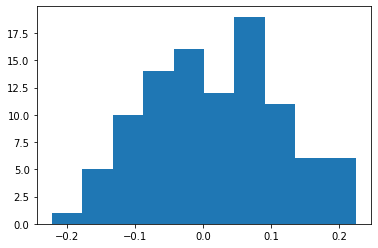

In [23]:
# Let us draw a histogram of weights
#  arriving at IInd neuron in the hidden layer
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(weights[1])

In [24]:
# Print biases
biases
biases.shape    # (100,)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

(100,)

In [26]:
# Finally compile the model
model.compile(
               loss = 'sparse_categorical_crossentropy',
               optimizer = 'rmsprop',   # This is the default
               metrics = ['accuracy']
              )

In [27]:
# Execute the algorithm now
model.fit(
           x_train,y_train,
           epochs = 10,
           verbose = 1
          )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6565 - accuracy: 0.7591
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3994 - accuracy: 0.8555
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3640 - accuracy: 0.8696
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3520 - accuracy: 0.8752
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3590 - accuracy: 0.8722
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3508 - accuracy: 0.8786
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3547 - accuracy: 0.8785
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3478 - accuracy: 0.8780
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3573 - accuracy: 0.8789
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.341

**Tuning a keras model**<br>
> Step1: Build NN model with one argument, 'hp'<br>
> Step2: Design/instantiate keras-tuner<br>
> Step3: Run/execute tuner <br>
> Step4: Print results

In [49]:
# Define a function that builds NN model
# and returns an NN model. It takes one argument

def build_model(hp):
   """Basic case:
      - We define a `build_model` function
      - It returns a compiled model
      - It uses hyperparameters defined on the fly
   """
   # How many neurons in Ist hidden layer 
   n_size1 = hp.Int('n_size1', 32, 200, default=64)
   # How many neurons in IInd hidden layer 
   n_size2 = hp.Int('n_size2', 32, 200, default=64)
   # Extent of dropout
   dropout1 = hp.Float('dropout1', 0, 0.5, step=0.1, default=0.5)
   dropout2 = hp.Float('dropout2', 0, 0.5, step=0.1, default=0.5)
   activation = hp.Choice('activation' , ['relu', 'tanh'])
   model = keras.models.Sequential(
                                    [
                                      keras.layers.Flatten(input_shape = [28,28]),
                                      keras.layers.Dense(n_size1,activation = activation),
                                      keras.layers.Dropout(dropout1),
                                      keras.layers.Dense(n_size2,activation = activation),
                                      keras.layers.Dropout(dropout2),
                                      keras.layers.Dense(10, activation = "softmax")
                                    ]
                                  )
   model.compile(
                 loss = 'sparse_categorical_crossentropy',
                 optimizer=keras.optimizers.Adam(
                                                   hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
                                                 ),
                 metrics = ['accuracy'])
   return model

**Design tuner**<br>
Instantiate a tuner<br>
(Three methods)<br>
> In the tuner(), you should specify the model-building function (*build()*), the name of the *objective* to optimize (whether to minimize or maximize is automatically inferred for built-in metrics), the total number of trials (*max_trials*) to test, and the number of models that should be built and fit for each trial (*executions_per_trial*).<br><br>
**Note**: the purpose of having multiple executions per trial is to reduce results variance and therefore be able to more accurately assess the performance of a model. Within a given *trial* (say, trial=20), an '*hp*' is created. For each '*execution_per_trial*', *build()* is called and the same '*hp*' is passed. But selected parameter values by the same '*hp*' can be different. If you want to get results faster, you could set executions_per_trial=1 (single round of training for each model configuration).

In [69]:
# Method 1
# Tune by pure random search
# What is 'executions_per_trial'
#  See: https://datascience.stackexchange.com/a/72292/64849
tuner_r = kt.RandomSearch(
                        build_model,              # Keras model to train
                        objective='val_accuracy', # Maximise/Minimise objective 
                        seed = 123,
                        max_trials = 5,           # Total number of trials to test at most.
                        executions_per_trial= 3,  # For each trial, run as many executions
                                                  # as in execution_per_trial. Given the randomness that
                                                  # exist in the optimization process, there may be some variation in
                                                  # the set of parameter selected by 'hp'. Final results could be very
                                                  # different. For each trial and execution, the tuner will fit the
                                                  #  model with as many epochs as you configure in the script.
                        directory='random_search',
                        overwrite=True,           # Overwrite results of last 'tuner'
                        project_name='fashion_mnist'
                      )

In [70]:
# Method 2
# Tune by optimized random search
# Hyperband is an optimized version of 
# random search which uses early-stopping
# to speed up the hyperparameter tuning process. 
# The main idea is to fit a large number of 
# models for a small number of epochs and to
# only continue training for the models 
# achieving the highest accuracy on the 
# validation set. The max_epochs variable
# is the max number of epochs that a model 
# can be trained for.

tuner_h = kt.Hyperband(
                     build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     overwrite=True,            # Overwrite results of last 'tuner'
                     hyperband_iterations=2
                     )

In [71]:
# Method 3
# Tune by Bayesian optimization
# Same signatures as of RandomSearch()
tuner_b = kt.tuners.BayesianOptimization(
                                       build_model1,
                                       objective='val_accuracy',
                                       overwrite=True,  # Overwrite results of last 'tuner'
                                       max_trials=5,
                                       executions_per_trial= 3,
                                       )

In [74]:
# Once the model and the tuner are set up, 
#  a summary of the task is easily available:
print("\n1. Random Search space summary")
tuner_r.search_space_summary()
print("\n2. Hyperband Search space summary")
tuner_h.search_space_summary()
print("\n3. Bayesian Search space summary")
tuner_b.search_space_summary()



Random Search space summary
Search space summary
Default search space size: 6
n_size1 (Int)
{'default': 64, 'conditions': [], 'min_value': 32, 'max_value': 200, 'step': 1, 'sampling': None}
n_size2 (Int)
{'default': 64, 'conditions': [], 'min_value': 32, 'max_value': 200, 'step': 1, 'sampling': None}
dropout1 (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
dropout2 (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}

Hyperband Search space summary
Search space summary
Default search space size: 6
n_size1 (Int)
{'default': 64, 'conditions': [], 'min_value': 32, 'max_value': 200, 'step': 1, 'sampling': None}
n_size2 (Int)
{'default': 64, 'conditions': [], 'min

**Start tuning**<br>
Invoke search() function<br>
> Here's what happens in search(): models are built iteratively by calling the model-building function, which populates the hyperparameter space (search space) tracked by the '*hp*' object. *Each call to build() may set different parameter combination.* The tuner progressively explores the space, recording metrics for each configuration.

In [75]:
# Start tuning
# This is common to all three methods of tuning
# The call to search has the same signature as model.fit()
# Here's what happens in search: models are built iteratively
#  by calling the model-building function, which populates the
#   hyperparameter space (search space) tracked by the hp object. 
#     The tuner progressively explores the space, recording metrics
#       for each configuration.

# Total elapsed time: 00h 04m 46s

tuner_r.search(x_train,y_train,
             validation_data=(x_test,y_test),
             epochs=10,
             callbacks=[
                        tf.keras.callbacks.EarlyStopping(patience=1)   # The more the patience more the epochs
                        ] 
             )

Trial 5 Complete [00h 01m 16s]
val_accuracy: 0.8705333272616068

Best val_accuracy So Far: 0.8709333340326945
Total elapsed time: 00h 04m 46s
INFO:tensorflow:Oracle triggered exit


In [76]:
# Tuning through Hyperband search
# Number of trials may be upto 60

# Total elapsed time: 00h 14m 00s

tuner_h.search(x_train,y_train,
             validation_data=(x_test,y_test),
             epochs=10,
             callbacks=[
                        tf.keras.callbacks.EarlyStopping(patience=1)
                        ] 
             )

Trial 60 Complete [00h 00m 38s]
val_accuracy: 0.868399977684021

Best val_accuracy So Far: 0.8770999908447266
Total elapsed time: 00h 14m 00s
INFO:tensorflow:Oracle triggered exit


In [77]:
# Tuning through Bayesian search

# Total elapsed time: 00h 03m 34s

tuner_b.search(x_train,y_train,
             validation_data=(x_test,y_test),
             epochs=10,
             callbacks=[
                        tf.keras.callbacks.EarlyStopping(patience=1)
                        ] 
             )

Trial 5 Complete [00h 00m 40s]
val_accuracy: 0.8626000086466471

Best val_accuracy So Far: 0.8626000086466471
Total elapsed time: 00h 03m 34s
INFO:tensorflow:Oracle triggered exit


In [78]:
# Show a summary of the RandomSearch space
print("\n1. Random Search results summary")
tuner_r.results_summary()
print("\n2. Hyperband results summary")
tuner_h.results_summary()
print("\n3. Bayesian results summary")
tuner_b.results_summary()


1. Random Search results summary
Results summary
Results in random_search/fashion_mnist
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
n_size1: 130
n_size2: 119
dropout1: 0.2
dropout2: 0.2
activation: tanh
learning_rate: 0.001
Score: 0.8709333340326945
Trial summary
Hyperparameters:
n_size1: 134
n_size2: 100
dropout1: 0.0
dropout2: 0.4
activation: tanh
learning_rate: 0.001
Score: 0.8705333272616068
Trial summary
Hyperparameters:
n_size1: 144
n_size2: 129
dropout1: 0.0
dropout2: 0.1
activation: relu
learning_rate: 0.01
Score: 0.8347333470980326
Trial summary
Hyperparameters:
n_size1: 119
n_size2: 130
dropout1: 0.5
dropout2: 0.2
activation: tanh
learning_rate: 0.01
Score: 0.7450666824976603
Trial summary
Hyperparameters:
n_size1: 41
n_size2: 193
dropout1: 0.5
dropout2: 0.30000000000000004
activation: relu
learning_rate: 0.01
Score: 0.568933347860972

2. Hyperband results summary
Results summary
Results in ./untitled_project
Showing 

In [79]:
# Retrieve the best model.
best_model_r = tuner_r.get_best_models(num_models=1)[0]
best_model_h = tuner_h.get_best_models(num_models=1)[0]
best_model_b = tuner_b.get_best_models(num_models=1)[0]

In [80]:
print("\n1. Random Search best model")
best_model_r
print("\n2. Hyperband results best model")
best_model_h
print("\n3. Bayesian results best model")
best_model_b


1. Random Search best model



2. Hyperband results best model



3. Bayesian results best model


In [82]:
# Evaluate the best model.
loss_r, accuracy_r = best_model_r.evaluate(x_test, y_test)
loss_h, accuracy_h = best_model_h.evaluate(x_test, y_test)
loss_b, accuracy_b = best_model_b.evaluate(x_test, y_test) 

313/313 [==============================] - 0s 956us/step - loss: 0.3668 - accuracy: 0.8667


In [83]:
print("\n1. Random Search Evaluation")
loss_r, accuracy_r
print("\n2. Hyperband results Evaluation")
loss_h, accuracy_h
print("\n3. Bayesian results Evaluation")
loss_b, accuracy_b


1. Random Search Evaluation


(0.3468863368034363, 0.8781999945640564)


2. Hyperband results Evaluation


(0.3468409776687622, 0.8770999908447266)


3. Bayesian results Evaluation


(0.370449036359787, 0.867900013923645)

In [ ]:
####### I am done ########################